# HEART STROKE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("1.healthcare-dataset-stroke-data.csv")

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#  EDA AND DATA PRE-PROCESSING 

In [4]:
df1 = df.drop(["id"],axis=1)

In [5]:
df1.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df1.shape #Total rows initially 5110

(5110, 11)

In [8]:
df1["gender"].unique() #['Male', 'Female', 'Other']
df1["work_type"].unique() # ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [9]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df1.isnull().sum() 

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI IS SUCH A THING THAT CAN'T BE USED AS AN AVERAGE VALUE, BECAUSE IT IS UNIQUE DESPITE AGE ,ONLY RELATED TO WEIGHT. HENCE IT'S BETTER TO DROP THE NULL VALUES IN BMI. 

In [11]:
df1.corr()["bmi"] 
#BMI IS SUCH A THING THAT CAN'T BE USED AS AN AVERAGE VALUE, 
#BECAUSE IT IS UNIQUE DESPITE AGE ,ONLY RELATED TO WEIGHT. HENCE IT'S BETTER TO DROP THE NULL VALUES IN BMI.

C:\Users\user\AppData\Local\Temp\ipykernel_7076\2953145980.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()["bmi"]


age                  0.333398
hypertension         0.167811
heart_disease        0.041357
avg_glucose_level    0.175502
bmi                  1.000000
stroke               0.042374
Name: bmi, dtype: float64

In [12]:
df2 = df1.dropna()#contains the rows after dropping the null values

In [13]:
df2.shape

(4909, 11)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [15]:
print(df2["gender"].value_counts())
print("--"*30)
print(df2["hypertension"].value_counts())
print("--"*30)
print(df2["heart_disease"].value_counts())
print("--"*30)
print(df2["ever_married"].value_counts())
print("--"*30)
print(df2["work_type"].value_counts())  
print("--"*30)
print(df2["Residence_type"].value_counts()) 
print("--"*30)
print(df2["avg_glucose_level"].value_counts()) 
print("--"*30)
print(df2["bmi"].value_counts())  
print("--"*30)
print(df2["smoking_status"].value_counts())
print("--"*30)
print(df2["stroke"].value_counts())  

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
------------------------------------------------------------
0    4458
1     451
Name: hypertension, dtype: int64
------------------------------------------------------------
0    4666
1     243
Name: heart_disease, dtype: int64
------------------------------------------------------------
Yes    3204
No     1705
Name: ever_married, dtype: int64
------------------------------------------------------------
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
------------------------------------------------------------
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
------------------------------------------------------------
93.88     6
72.49     5
83.16     5
73.00     5
91.68     5
         ..
72.06     1
97.90     1
230.59    1
224.63    1
85.28     1
Name: avg_glucose_level, Length: 3852, dtype: int64
-----------

In [16]:
df2.head(10)
df2.shape

(4909, 11)

In [17]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [18]:
#Now I will make changes in df2!! We will use OHE for categorical datas
dummies = pd.get_dummies(df2["gender"])
dummies.head()

,Female,Male,Other
0,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0


In [19]:
df3 = pd.concat([df2,dummies],axis=1)

In [20]:
df3.drop(["gender"],1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7076\1743105546.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3.drop(["gender"],1,inplace=True)


In [21]:
df3.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,0
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,0
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0,0
5,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0,1,0


In [22]:
dummies1 = pd.get_dummies(df3["work_type"])
dummies1.head()
df3 = pd.concat([df3,dummies1],axis=1)

In [23]:

df3.drop(["work_type"],1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7076\1749618364.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3.drop(["work_type"],1,inplace=True)


In [24]:
df3.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children
0,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1,0,1,0,0,0,1,0,0
2,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1,0,1,0,0,0,1,0,0
3,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1,1,0,0,0,0,1,0,0
4,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1,1,0,0,0,0,0,1,0
5,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1,0,1,0,0,0,1,0,0


In [25]:
# Married people and heart_stroke relation is pretty meaningless.Hence dropping the column
df3.drop(["ever_married"],axis=1,inplace=True)
df3.drop(["Residence_type"],axis=1,inplace=True) # Not required for heart_stroke_prediction

In [26]:
df3.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children
0,67.0,0,1,228.69,36.6,formerly smoked,1,0,1,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,never smoked,1,0,1,0,0,0,1,0,0
3,49.0,0,0,171.23,34.4,smokes,1,1,0,0,0,0,1,0,0
4,79.0,1,0,174.12,24.0,never smoked,1,1,0,0,0,0,0,1,0
5,81.0,0,0,186.21,29.0,formerly smoked,1,0,1,0,0,0,1,0,0


In [27]:
df3["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [28]:
dummies2 = pd.get_dummies(df3["smoking_status"])
dummies2.head()

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
5,0,1,0,0


In [29]:
df3 = pd.concat([df3,dummies2],axis=1)

In [30]:
df3.drop(["smoking_status"],1)

C:\Users\user\AppData\Local\Temp\ipykernel_7076\2566945934.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3.drop(["smoking_status"],1)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,0,0,0,0,1,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,0,1,0,0,0,1,0,0


In [31]:
df4 = df3.copy()
df4.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,formerly smoked,1,0,1,0,0,0,1,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,never smoked,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,smokes,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.0,never smoked,1,1,0,0,0,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,formerly smoked,1,0,1,0,0,0,1,0,0,0,1,0,0


C:\Users\user\AppData\Local\Temp\ipykernel_7076\1357114418.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.corr()["stroke"].sort_values().plot(kind="bar")
C:\Users\user\AppData\Local\Temp\ipykernel_7076\1357114418.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.corr()["avg_glucose_level"].sort_values().plot(kind="bar")


<Axes: title={'center': 'Average Glucose Correlation'}>

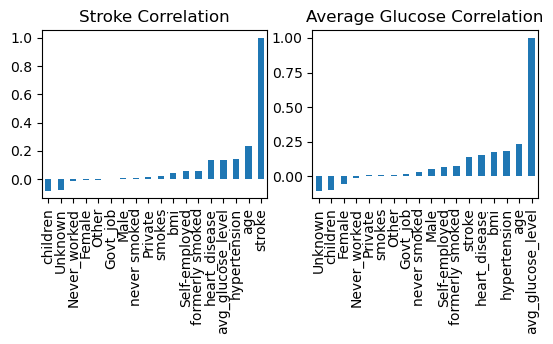

In [32]:
plt.subplot(221)
plt.rcParams["figure.figsize"]= (20,20)
plt.title("Stroke Correlation")
df4.corr()["stroke"].sort_values().plot(kind="bar")

plt.subplot(222)
plt.title("Average Glucose Correlation")
df4.corr()["avg_glucose_level"].sort_values().plot(kind="bar")



In [33]:
#1.Based on above Stroke has good correlation with factors such as Heart_disease,avg_glucose level,hypertension,age*
#2.glucose level shows a spike for people with: stroke,heart_disease,BMI,hypertension,age


C:\Users\user\AppData\Local\Temp\ipykernel_7076\417768116.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(),cmap="autumn",annot=True,fmt=".1f")


<Axes: >

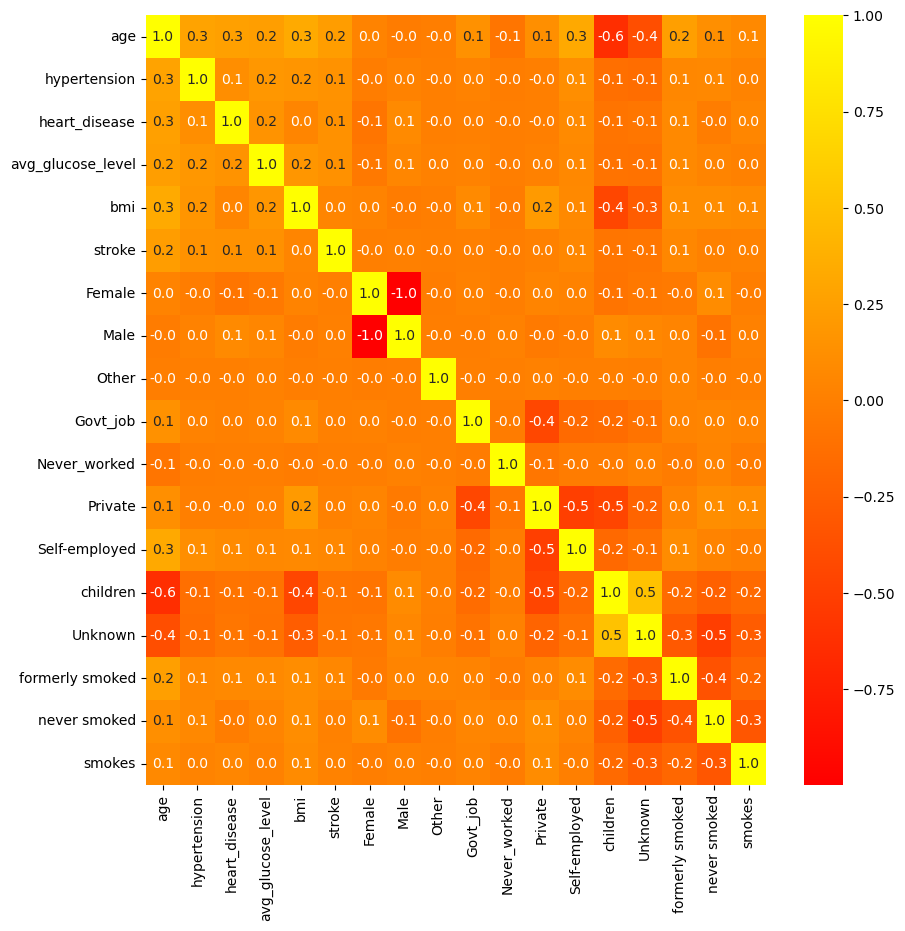

In [34]:
#Let us plot the heat map for correlation 
plt.rcParams["figure.figsize"]=(10,10)
sns.heatmap(df4.corr(),cmap="autumn",annot=True,fmt=".1f")

In [35]:
df4.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575,0.590141,0.409656,0.000204,0.128336,0.004482,0.572622,0.157873,0.136688,0.302098,0.170503,0.377266,0.150132
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917,0.491858,0.491820,0.014273,0.334497,0.066801,0.494748,0.364659,0.343552,0.459214,0.376113,0.484752,0.357238
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='children', ylabel='count'>

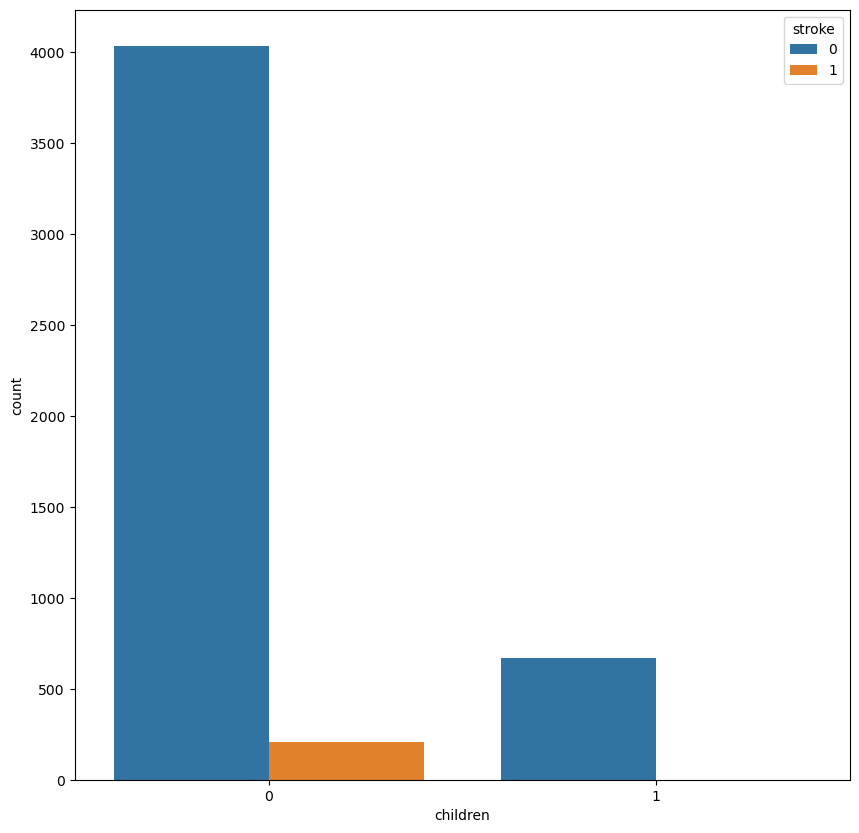

In [36]:
sns.countplot(x="children",data=df4,hue="stroke")
# no children has stroke probabilty according to data
# sns.countplot(x="Male",data=df4,hue="stroke")

In [142]:
df4.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,formerly smoked,1,0,1,0,0,0,1,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,never smoked,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,smokes,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.0,never smoked,1,1,0,0,0,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,formerly smoked,1,0,1,0,0,0,1,0,0,0,1,0,0


In [143]:
print(df4["smoking_status"].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


<Axes: xlabel='smoking_status', ylabel='count'>

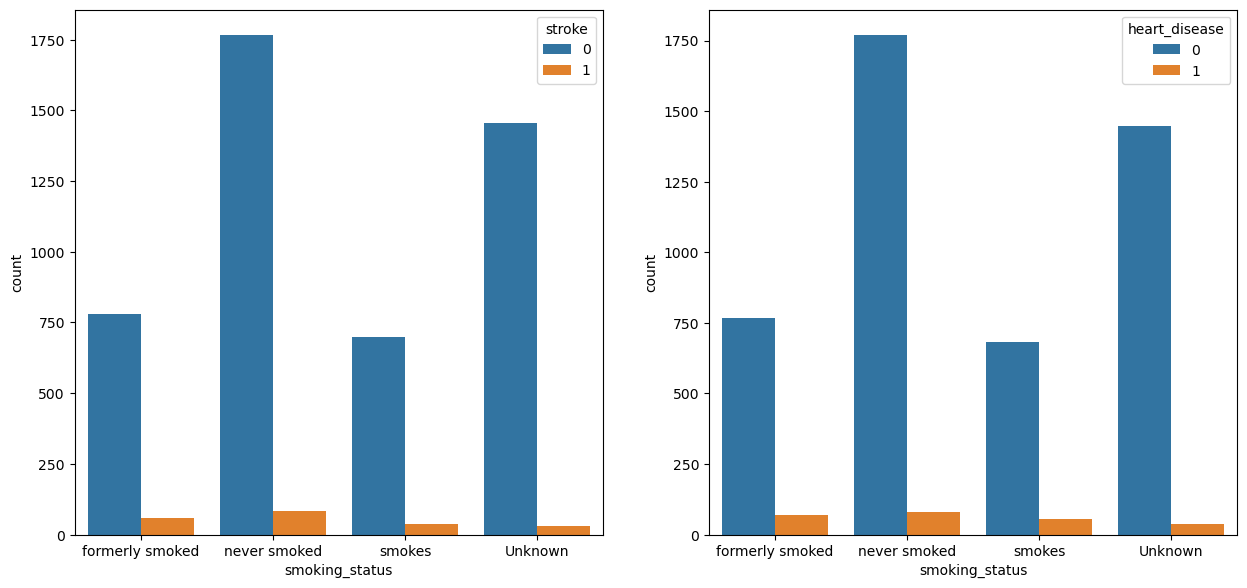

In [37]:
plt.rcParams["figure.figsize"]=(15,15)
plt.subplot(221)
sns.countplot(x="smoking_status",data=df4,hue="stroke")

plt.subplot(222)
sns.countplot(x="smoking_status",data=df4,hue="heart_disease")

<Axes: title={'center': 'Male_Heart_Disease_Analysis'}, xlabel='Male', ylabel='count'>

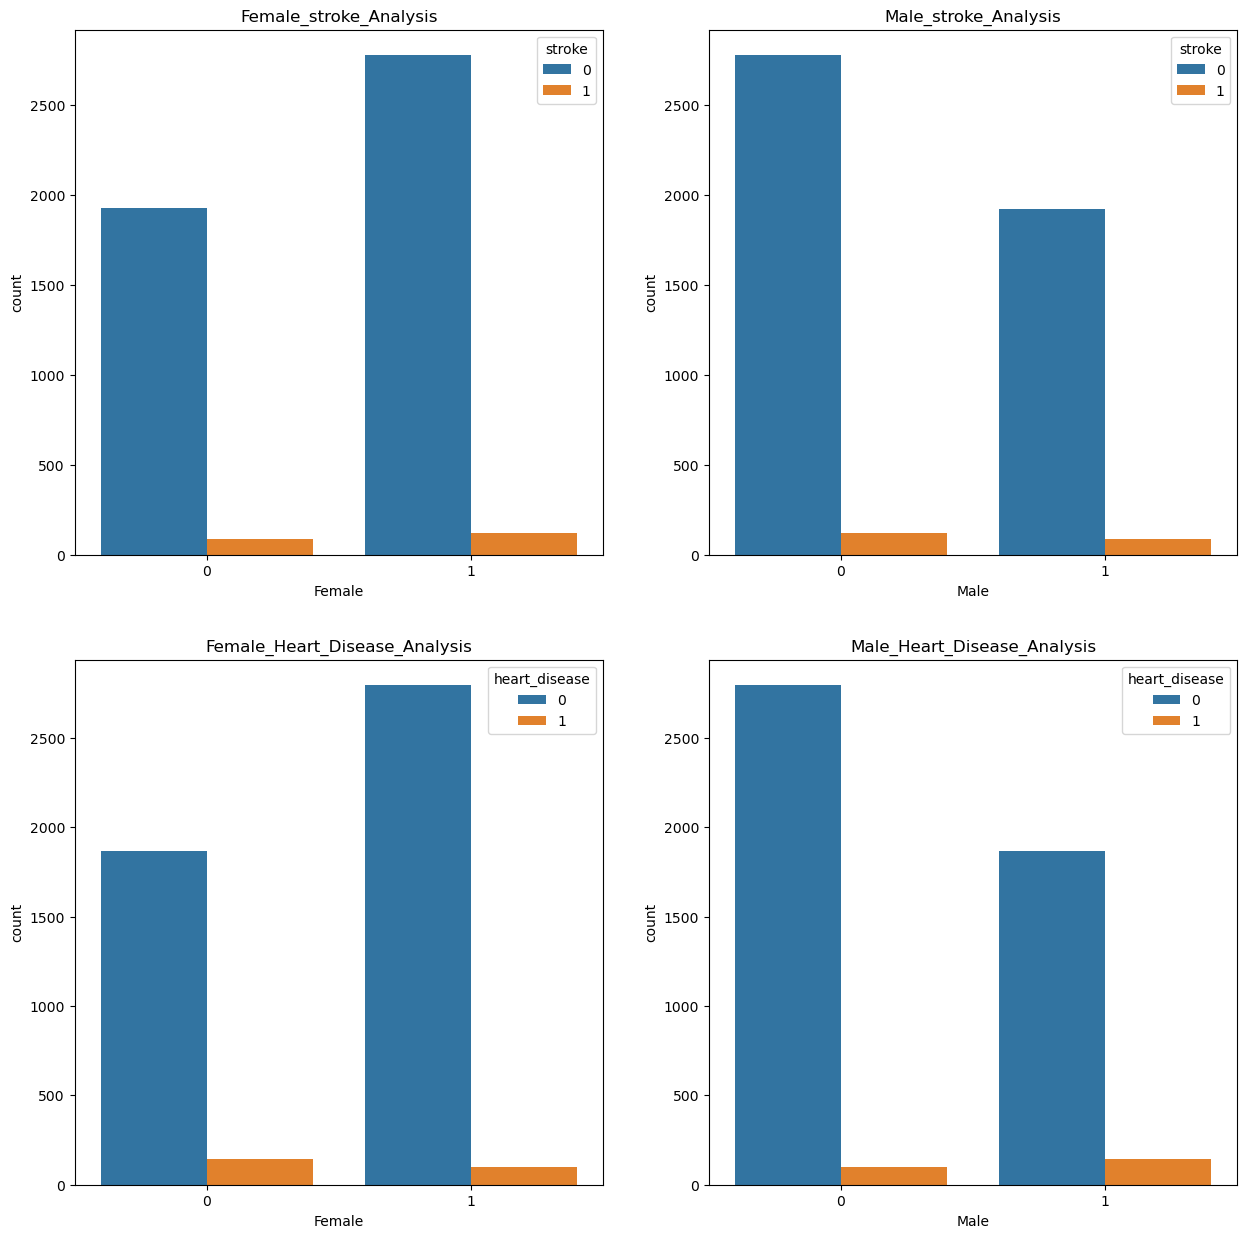

In [38]:
plt.rcParams["figure.figsize"]=(15,15)

plt.subplot(221)
plt.title("Female_stroke_Analysis")
sns.countplot(x="Female",data=df4,hue="stroke")


plt.subplot(222)
plt.title("Male_stroke_Analysis")
sns.countplot(x="Male",data=df4,hue="stroke")


plt.subplot(223)
plt.title("Female_Heart_Disease_Analysis")
sns.countplot(x="Female",data=df4,hue="heart_disease")


plt.subplot(224)
plt.title("Male_Heart_Disease_Analysis")
sns.countplot(x="Male",data=df4,hue="heart_disease")

In [51]:
# BASED ON THE ABOVE PLOTS:
# CONCLUSIONS CAN BE DRAWN SUCH AS:
# 1. THOSE WHO NEVER SMOKED COMPARED TO OTHERS HAVE A GREATER PROBABILITY OF STROKE AND HEART ATTACK.
# 2. FEMALES HAVE GREATER PROBABILITY FOR STROKES COMPARED TO MALE
# 3. AND MEN HAVE HIGHER HEART DISEASE CHANCES IN COMPARISON TO WOMEN.

In [56]:
df4.drop(["smoking_status"],axis=1,inplace=True)
X = df4.drop(["stroke"],axis = 1)
y = df4["stroke"]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
X_train.shape

(3927, 17)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log = LogisticRegression(max_iter=600)

In [62]:
log.fit(X_train,y_train)

LogisticRegression(max_iter=600)

In [63]:
y_pred = log.predict(X_test)

In [64]:
log.score(X_test,y_test)

0.9572301425661914

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [66]:
accuracy = accuracy_score(y_test,y_pred)

In [67]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [68]:
print(f"ACCURACY_SCORE is {accuracy}.")
print(f"CONFUSION_MATRIX is: \n {conf_matrix}")

ACCURACY_SCORE is 0.9572301425661914.
CONFUSION_MATRIX is: 
 [[940   0]
 [ 42   0]]


In [71]:
#FALSE NEGATIVE VALUE IS 42,TRUE NEGATIVE is 940.


1506    0
1226    0
1887    0
2195    0
89      1
       ..
3898    0
1830    0
1379    0
231     1
4299    0
Name: stroke, Length: 982, dtype: int64

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_samples=0.75)

In [155]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [156]:
print(f"accuracy_score is {accuracy_score(y_test,y_pred)}")
print(confusion_matrix(y_test,y_pred))

accuracy_score is 0.955193482688391
[[938   2]
 [ 42   0]]


In [157]:
# svc.fit(X_train,y_train)
# y_pred = svc.predict(X_test)
# accuracy_score(y_test,y_pred)

In [160]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring="accuracy"))

0.9557957521093977

In [161]:
n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]
# 4*3*3*3 = 108

In [162]:
params = {"n_estimators":n_estimators,"max_features":max_features, "max_depth":max_depth, "max_samples" : max_samples}

In [166]:
print(params)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [167]:
rf = RandomForestClassifier()

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
rf_grid  = GridSearchCV(estimator=rf,param_grid=params,cv = 5,verbose = 2,n_jobs=-1)

In [170]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [171]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 120}

In [172]:
rf_grid.best_index_

39

In [173]:
rf_grid.best_score_

0.9577290481515697